<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
<p>
Cette étude a été réalisée dans le cadre du 5ème projet de ma formation Datascientist dispensée en MOOC par 
**<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>**.
</p>    

<p>
Le modèle étudié se base sur les données fournies par le site :
</p>
<p>
https://archive.ics.uci.edu/ml/datasets/Online+Retail
</p>
<p>

<p>
Ce notebook présente l'analyse des nouvelles feautres issues du traitement NLP de la colonne ``Description`` du dataset.
</p>

<p>
Ce notebook implémente les phases de l'analyse exploratoire de la façon suivante :
</p>
* l'acquisition des données issues du sampling réalisé dans le notebook ``P5_2.ipynb``
* les phases de traitement NLP des données textuelles.
* l'analyse exploratoire de ces nouvelles données    
* l'analyse et l'évaluation du clustering de ces données    

**Les résultats de cette analyse sont reprise dans le notebook <font color='blue'>*P5_AllFeature.ipynb*</font>**. 

Ce dernier notebook permet d'évaluer les différents modèles de prédiction.

In [68]:
%matplotlib inline
import pandas as pd
import numpy as np
import time

import warnings
warnings.filterwarnings("ignore")


import p3_util
import p3_util_plot
import p5_util
import p5_util_plot

#--------------------------
# Process flow parameters
#--------------------------
is_reloaded = True

#---------------------------------------------------------------------------
# Outliers values issued from Total feature are removed or not from dataset.
is_total_no_outliers = False
#---------------------------------------------------------------------------
is_pca_plot = True

#### <font color='blue'>Restore *df_invoice_line* dataframe</font>

In [2]:
import p5_util
if is_reloaded is True:
    df_invoice_line =  p5_util.p5_reload_data_sample()
    print(df_invoice_line.shape)    

df_invoice_line = df_invoice_line.reset_index()

del(df_invoice_line['index'])
df_invoice_line.sample(1)

p5_util.object_load : fileName= ./data/df_invoice_line_sample_random.dump
(194907, 7)
(194907, 7)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
181810,578999,75049L,LARGE CIRCULAR MIRROR MOBILE,6,2011-11-27 16:08:00,1.25,17595


In [3]:
nb_invoices = len(df_invoice_line['InvoiceNo'].unique())
print("\n*** Nombre de factures= "+str(nb_invoices))


*** Nombre de factures= 9330


# <font color='blus'>Building features from *Description* column</font>

**Item names are processed with NLTK package. This process aims to create new features issues from Natural Language Processing.**

**Those features will be then aggregated with RFM encoded feautures, UnitPrice and Total.**

**Let's consider all items into *Description* feature as a corpus.**

**Remove any punctuation from any *Description* feature**

### <font color='blue'>Restore sample into *df_invoice_line*</font>

In [4]:
import p5_util

df_invoice_line =  p5_util.p5_reload_data_sample()
print(df_invoice_line.shape)    

# <font color='blue'>Columns filtering</font>
list_col_del = ['StockCode','InvoiceNo' ,'Quantity', 'InvoiceDate', 'UnitPrice','Country']
for col_to_del in list_col_del:
    if col_to_del in df_invoice_line.columns:
        del(df_invoice_line[col_to_del])
print(df_invoice_line.shape)

p5_util.object_load : fileName= ./data/df_invoice_line_sample_random.dump
(194907, 7)
(194907, 7)
(194907, 2)


### <font color='blue'>N.L.P. using NLTK</font>

#### *<font color='blue'> csr_matrix_weights</font>* is backup from call of *<font color='blue'>p5_util.nlp_process()</font>*

In [5]:
import p5_util
list_no_words=['SET','PACK']
df_invoice_line, vectorizer, csr_matrix_weights \
= p5_util.nlp_process(df_invoice_line,'Description' ,list_no_words=list_no_words)

3672
3623
3616
3583
3581
3581
3576
3573
(194907, 1716)
Dumping matrix_weights into file= ./data/matrix_weights_NLP.dump
Done!


In [6]:
#-------------------------------------------------------------------------
# Description is droped from columns
#-------------------------------------------------------------------------
if 'Description' in df_invoice_line.columns:
    del(df_invoice_line['Description'])

In [7]:
df_invoice_line.shape

(194907, 1)

#### Restore matrix weights

In [8]:
import p5_util

df_invoice_line =  p5_util.p5_reload_data_sample()
print(df_invoice_line.shape)    

# <font color='blue'>Columns filtering</font>
df_invoice_line = df_invoice_line[['Description', 'CustomerID']]
if False:
    list_col_del = ['StockCode','InvoiceNo' ,'Quantity', 'InvoiceDate', 'UnitPrice','Country']
    for col_to_del in list_col_del:
        if col_to_del in df_invoice_line.columns:
            del(df_invoice_line[col_to_del])
print(df_invoice_line.shape)
df_invoice_line.columns

p5_util.object_load : fileName= ./data/df_invoice_line_sample_random.dump
(194907, 7)
(194907, 7)
(194907, 2)


Index(['Description', 'CustomerID'], dtype='object')

### Matrix of NLP Weights computed per row are aggregated per customer

In [9]:
import pandas as pd
import p5_util

matrix_weights_NLP = p5_util.object_load('./data/matrix_weights_NLP.dump')
print(matrix_weights_NLP.shape)

root_name = 'w_nlp_'
df_customers_w_nlp = p5_util.df_nlp_sum_per_customer(df_invoice_line, matrix_weights_NLP, root_name)
del(csr_matrix_weights)
del(df_invoice_line)

print(df_customers_w_nlp.shape)

p5_util.object_load : fileName= ./data/matrix_weights_NLP.dump
(194907, 1716)
(2124, 1717)


In [10]:
df_customers_w_nlp.sample(1)

,CustomerID,w_nlp_1,w_nlp_2,w_nlp_3,w_nlp_4,w_nlp_5,w_nlp_6,w_nlp_7,w_nlp_8,w_nlp_9,...,w_nlp_1707,w_nlp_1708,w_nlp_1709,w_nlp_1710,w_nlp_1711,w_nlp_1712,w_nlp_1713,w_nlp_1714,w_nlp_1715,w_nlp_1716
1534,16794,0.0,0.0,0.0,0.0,1.579236,0.0,0.0,0.0,0.0,...,0.0,0.0,4.407445,0.0,0.0,0.0,0.0,0.0,2.426116,0.0


#### Backup 

In [11]:
import p5_util

fileName = './data/df_customers_w_nlp.dump'
p5_util.object_dump(df_customers_w_nlp,fileName)

# <font color='blus'> PCA NLP features</font>

#### Restore 

In [12]:
import p5_util

fileName = './data/df_customers_w_nlp.dump'
df_customers_w_nlp = p5_util.object_load(fileName)

p5_util.object_load : fileName= ./data/df_customers_w_nlp.dump


In [13]:
df_customers_w_nlp.columns

Index(['CustomerID', 'w_nlp_1', 'w_nlp_2', 'w_nlp_3', 'w_nlp_4', 'w_nlp_5',
       'w_nlp_6', 'w_nlp_7', 'w_nlp_8', 'w_nlp_9',
       ...
       'w_nlp_1707', 'w_nlp_1708', 'w_nlp_1709', 'w_nlp_1710', 'w_nlp_1711',
       'w_nlp_1712', 'w_nlp_1713', 'w_nlp_1714', 'w_nlp_1715', 'w_nlp_1716'],
      dtype='object', length=1717)

#### Restore 

In [14]:
is_reloaded

True

In [15]:
import p5_util
is_reloaded=True
if is_reloaded is True:
    fileName = './data/df_customers_w_nlp.dump'
    df_customers_nlp = p5_util.object_load(fileName)
    print(df_customers_nlp.shape)
else:
    df_customers_nlp = df_w_nlp.copy()

p5_util.object_load : fileName= ./data/df_customers_w_nlp.dump
(2124, 1717)


In [16]:
df_customers_nlp.sample(1)

,CustomerID,w_nlp_1,w_nlp_2,w_nlp_3,w_nlp_4,w_nlp_5,w_nlp_6,w_nlp_7,w_nlp_8,w_nlp_9,...,w_nlp_1707,w_nlp_1708,w_nlp_1709,w_nlp_1710,w_nlp_1711,w_nlp_1712,w_nlp_1713,w_nlp_1714,w_nlp_1715,w_nlp_1716
1655,17109,0.650984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.395804,0.0,0.0,0.0,0.0,0.0,0.463465,0.0


In [17]:
import p3_util_plot
list_col = [col for col in df_customers_nlp.columns  if col != 'CustomerID' ]

In [69]:
is_pca_plot

True

** Component = 100
** Component = 200
** Component = 300
** Component = 400
** Component = 500
** Component = 600
** Component = 700
** Component = 800
** Component = 900
** Component = 1000
** Component = 1100
** Component = 1200
** Component = 1300
** Component = 1400
** Component = 1500
** Component = 1600
** Component = 1700


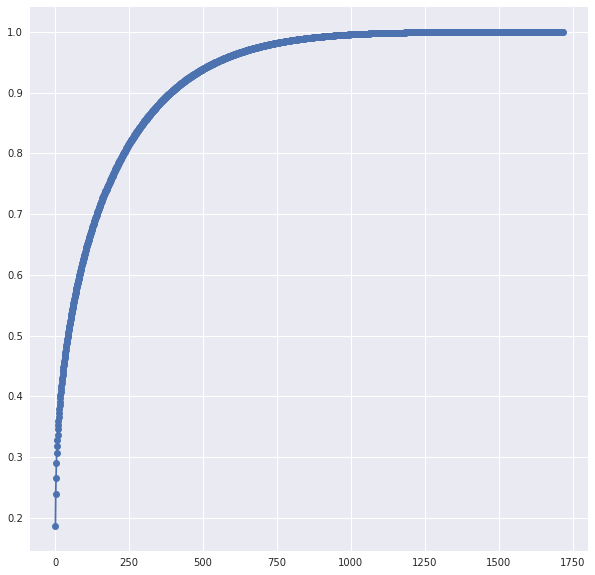

In [70]:
import p3_util_plot
if is_pca_plot is True:
    z__ = p3_util_plot.df_pca_all_plot(df_customers_nlp[list_col], plot=True)

#### Getting data explaining 90% of variance

In [20]:
df_customers_nlp.shape

(2124, 1717)

#### 250 features allows to explain 90% of the total variance

In [21]:
n_dim=250

In [22]:
import p5_util

print(df_customers_nlp.shape)

root_name = 'nlp_pca_'
df_customers_pca_nlp, pca = p5_util.df_pca_reduce(df_customers_nlp\
                                            , n_dim, root_name, p_is_scale=False)
print(df_customers_pca_nlp.shape)


(2124, 1717)
(2124, 250)


In [23]:
df_customers_pca_nlp.sample(1)
#df_customers_nlp.sample(1)

,nlp_pca_0,nlp_pca_1,nlp_pca_2,nlp_pca_3,nlp_pca_4,nlp_pca_5,nlp_pca_6,nlp_pca_7,nlp_pca_8,nlp_pca_9,...,nlp_pca_240,nlp_pca_241,nlp_pca_242,nlp_pca_243,nlp_pca_244,nlp_pca_245,nlp_pca_246,nlp_pca_247,nlp_pca_248,nlp_pca_249
CustomerID,,,,,,,,,,,,,,,,,,,,,
13003,-9.583554,0.067185,2.512326,-0.748675,1.722055,-0.236616,0.30171,-0.392929,0.470869,0.093755,...,-0.038251,0.190156,0.05745,-0.038524,0.050787,0.111236,0.141248,-0.100709,0.113715,0.073527


#### Backup dumped file 

In [24]:
import p5_util
fileName = './data/df_customers_pca_nlp.dump'
p5_util.object_dump(df_customers_pca_nlp, fileName)

# <font color='blus'> Clustering NLP features</font>

#### Loading dumped file into *df_customers* dataframe

In [25]:
import p5_util
if is_reloaded is True:
    fileName = './data/df_customers_pca_nlp.dump'
    df_customers = p5_util.object_load(fileName)
    print(df_customers.shape)
else:
    df_customers = df_customers_pca_nlp

p5_util.object_load : fileName= ./data/df_customers_pca_nlp.dump
(2124, 250)


## <font color='blue'> NLP features: Kmeans Clustering</font>

In [26]:
import p5_util
cluster_start = 1
cluster_end = 11
dict_kmeans = p5_util.kmeans_scan_inter_inertia(df_customers, cluster_start, cluster_end)

Clustering : 1 clusters
Clustering : 2 clusters
Clustering : 3 clusters
Clustering : 4 clusters
Clustering : 5 clusters
Clustering : 6 clusters
Clustering : 7 clusters
Clustering : 8 clusters
Clustering : 9 clusters
Clustering : 10 clusters


#### Save of Kmeans clustering scan from NLP features into a dumped file

In [27]:
import p5_util

fileName = './data/clustering_dict_kmeans_NLP.dump'
p5_util.object_dump(dict_kmeans, fileName)

#### NLP : Plot Clusters = F(inter-inertia)

p5_util.object_load : fileName= ./data/clustering_dict_kmeans_NLP.dump
Records into Time feaures dict_kmeans= 10
1 10


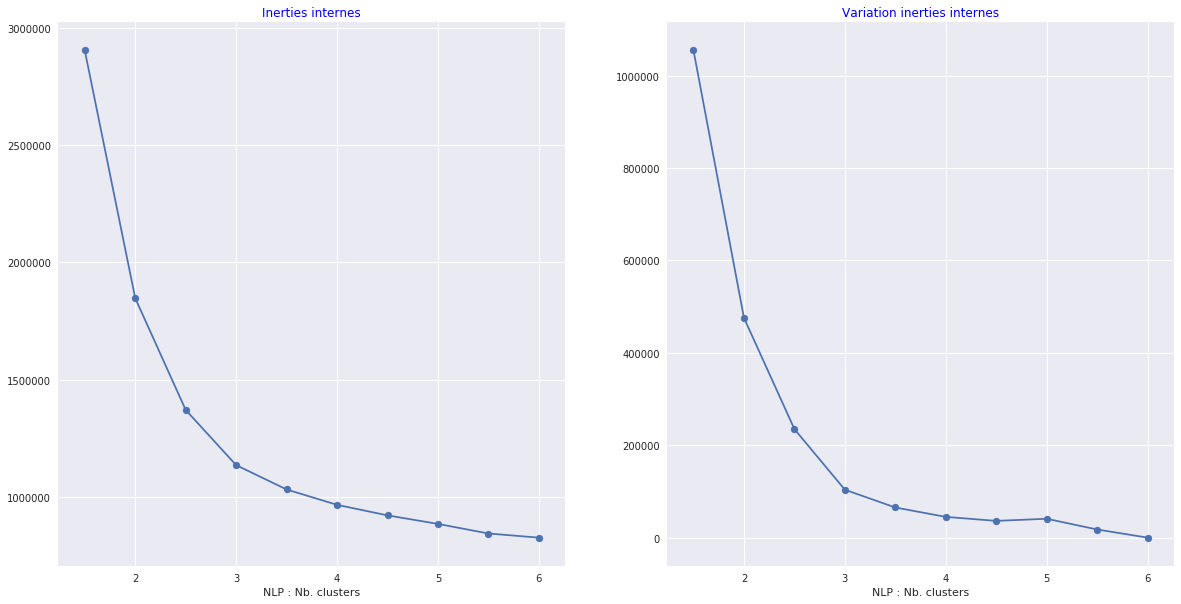

In [28]:
import p5_util_plot
import p5_util

if is_reloaded is True:
    fileName = './data/clustering_dict_kmeans_NLP.dump'
    dict_kmeans = p5_util.object_load(fileName)
    print("Records into Time feaures dict_kmeans= "+str(len(dict_kmeans)))

x_label_0 = 'NLP : Nb. clusters'
x_label_1 = 'NLP : Nb. clusters'
cluster_start = list(dict_kmeans.keys())[0]
cluster_end = list(dict_kmeans.keys())[len(dict_kmeans)-1]
print(cluster_start, cluster_end)
p5_util_plot.plot_kmeans_interInertia(dict_kmeans, cluster_start, cluster_end\
                             ,[x_label_0, x_label_1]\
                             ,p_rows=1, p_cols=2, p_figsize=(20,10))

#### Clustering : NLP Kmeans silhouette

In [29]:
import p5_util
import p5_util_plot

if True:
    fileName = './data/df_customers_pca_nlp.dump'
    df_customers = p5_util.object_load(fileName)
    print("NLP features : "+str(df_customers.shape))
    
    #-------------------------------------------------------------------------------
    # Use kmeans dictionary to get numbers of clusters
    #-------------------------------------------------------------------------------
    fileName = './data/clustering_dict_kmeans_NLP.dump'
    dict_kmeans = p5_util.object_load(fileName)
    print("Clusters from NLP features Kmeans models into dict_kmeans= "+str(len(dict_kmeans)))
    cluster_start = list(dict_kmeans.keys())[0]
    cluster_end = list(dict_kmeans.keys())[len(dict_kmeans)-1]
    print("Cluster start = "+str(cluster_start)+" Cluster end= "+str(cluster_end))


dict_cluster_kmeans_silhouette = p5_util.kmeans_scan_silhouette(df_customers, cluster_start, cluster_end)

p5_util.object_load : fileName= ./data/df_customers_pca_nlp.dump
NLP features : (2124, 250)
p5_util.object_load : fileName= ./data/clustering_dict_kmeans_NLP.dump
Clusters from NLP features Kmeans models into dict_kmeans= 10
Cluster start = 1 Cluster end= 10
Cluster 2 done!
Cluster 3 done!
Cluster 4 done!
Cluster 5 done!
Cluster 6 done!
Cluster 7 done!
Cluster 8 done!
Cluster 9 done!


#### Backup silhouette clustering result

In [30]:
import p5_util
fileName = './data/dict_cluster_kmeans_silhouette_NLP.dump'
p5_util.object_dump(dict_cluster_kmeans_silhouette,fileName)

#### Plotting silhouette = F(nb clusters)

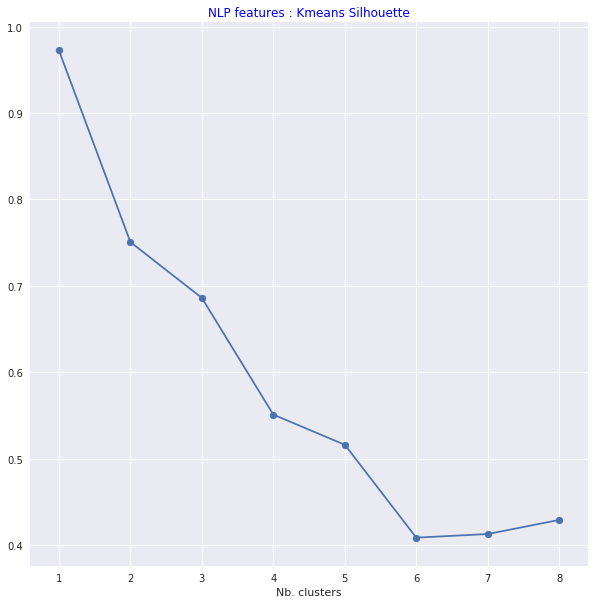

In [31]:
p_title='NLP features : Kmeans Silhouette'
p5_util_plot.plot_kmeans_silhouette(dict_cluster_kmeans_silhouette, p_title, p_figsize=(10,10))

### <font color='blue'>Cluster model with best number of clusters</font>

In [32]:
n_cluster=3

In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics
X = df_customers.values

#csr_invoice_matrix = sparse.csr_matrix(df_RFM_encoded.values)
cluster_kmean = KMeans(n_clusters=n_cluster).fit(X)

# Predict the cluster for each data point
preds_kmean = cluster_kmean.predict(X)

### <font color='blue'>Adding *cluster* issue fro clustering into *df_customers*  as a new feature</font>

In [34]:
if 'cluster' in df_customers.columns:
    del(df_customers['cluster'])
df_customers.shape,preds_kmean.shape

((2124, 250), (2124,))

In [35]:
import p5_util

print(df_customers.shape)
df_customers = p5_util.df_add_cluster(df_customers, preds_kmean)
print(df_customers.shape)

(2124, 250)
(2124, 251)


In [36]:
df_customers.columns

Index(['cluster', 'nlp_pca_0', 'nlp_pca_1', 'nlp_pca_2', 'nlp_pca_3',
       'nlp_pca_4', 'nlp_pca_5', 'nlp_pca_6', 'nlp_pca_7', 'nlp_pca_8',
       ...
       'nlp_pca_240', 'nlp_pca_241', 'nlp_pca_242', 'nlp_pca_243',
       'nlp_pca_244', 'nlp_pca_245', 'nlp_pca_246', 'nlp_pca_247',
       'nlp_pca_248', 'nlp_pca_249'],
      dtype='object', length=251)

### <font color='blue'>Showing elements count per cluster</font>

Clusters = [0 1 2]
Population cumulée par cluster = 2124
         Count
cluster       
0           96
1            1
2         2027


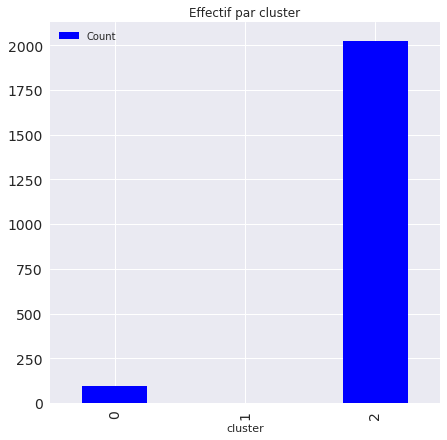

In [37]:
import p5_util_plot
p5_util_plot.plot_cluster_frequency(df_customers)

## <font color='blue'> DBSCAN clustering</font>

#### Distances distribution

In [38]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

if 'cluster' in df_customers.columns:
    del(df_customers['cluster'])
    
distances = pdist(df_customers.values, metric='euclidean')

print(np.min(distances), np.max(distances))



x_med = np.median(distances)
print("Distance median = "+str(x_med))
print("Nb elts de distances= "+str(len(distances)))
len(np.where(distances<x_med)[0])

raws = df_customers.shape[0]
print("Distance elts computing : n*(n+1)/2 - n = "+str(int((raws*(raws+1)/2)-raws)))

df_dist = pd.DataFrame(distances)

df_dist_quantiles = df_dist.quantile(q=[0.15, 0.25 ,0.5, 0.75, 0.95])

df_dist_quantiles.rename(columns={0:'Distance'},inplace=True)
df_dist_quantiles

0.0 1036.840613673533
Distance median = 18.05809335257681
Nb elts de distances= 2254626
Distance elts computing : n*(n+1)/2 - n = 2254626


,Distance
0.15,8.140229
0.25,10.697023
0.50,18.058093
0.75,31.758019
0.95,79.008785


In [39]:
p_eps=7.0

#### Computing nb neighbours for 95% fo distances

In [40]:
import numpy as np

dist_matrix = squareform(distances)
print(dist_matrix.shape)
dict_ball_neighbour = dict()
for raw in range(0,dist_matrix.shape[0]):
    dict_ball_neighbour[raw] = len(np.where(dist_matrix[raw]<= p_eps)[0])

(2124, 2124)


In [41]:
ser_ball_neighbour = pd.Series(dict_ball_neighbour)
ser_neighbour_quantiles = ser_ball_neighbour.quantile(q=[0.15, 0.25 ,0.5, 0.75, 0.95, 1.0])
ser_neighbour_quantiles

0.15      1.0
0.25      1.0
0.50      1.0
0.75    597.5
0.95    748.0
1.00    769.0
dtype: float64

### DBSCAN clustering

In [42]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=p_eps,min_samples=3500, n_jobs=3)
if 'cluster' in df_customers.columns:
    del(df_customers['cluster'])
pred_dbscan =  dbscan.fit_predict(df_customers)

import numpy as np
np.unique(pred_dbscan)

array([-1], dtype=int32)

(2124, 250)
(2124, 251)
Clusters = [-1]
Population cumulée par cluster = 2124
         Count
cluster       
-1        2124


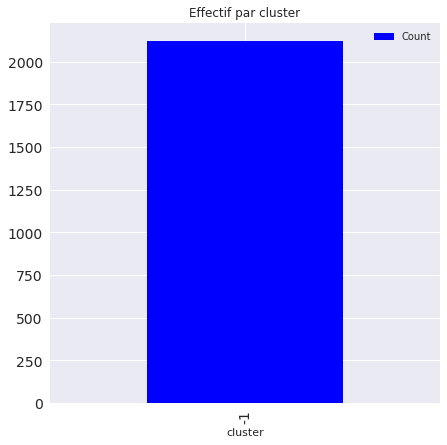

In [43]:
import p5_util
import p5_util_plot

print(df_customers.shape)
df_customers = p5_util.df_add_cluster(df_customers, pred_dbscan)
print(df_customers.shape)
p5_util_plot.plot_cluster_frequency(df_customers)

# <font color='blus'>GMM clustering</font>

In [44]:
cluster_start = 1
cluster_end = 11

#### GMM clustering evaluation : using BIC and AIC criterias

* AIC : mesure de la qualité du modele statistique. C'est une mesure de la perte d'information lorsque plusieurs modeles sont proposés, ceux-cic étant de complexité croissante.
* BIC : dérive de l'AIC

Objectif : minimiser ces deux critères.

In [45]:
from sklearn.mixture import GaussianMixture
#cluster_start = 1
#cluster_end = 20
X = df_customers.values
n_components = np.arange(cluster_start, cluster_end)
print("Clustering from clusters range from : "+str(cluster_start)+" --> "+str(cluster_end))
p_covariance_type= 'spherical'
p_covariance_type= 'full'
list_gmm_model = [ GaussianMixture(n, covariance_type=p_covariance_type, random_state=0).fit(X) for n in n_components]

Clustering from clusters range from : 1 --> 11


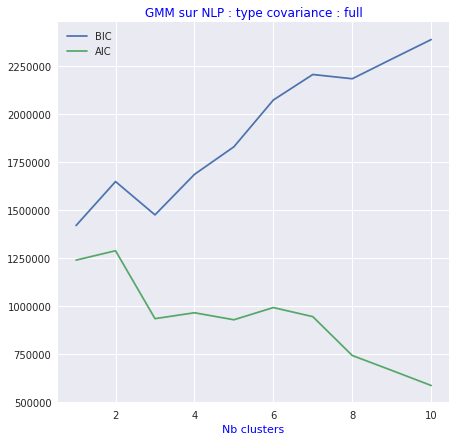

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))

plt.plot(n_components, [model.bic(X) for model in list_gmm_model], label='BIC')
plt.plot(n_components, [model.aic(X) for model in list_gmm_model], label='AIC')
plt.legend(loc='best')
plt.title("GMM sur NLP : type covariance : "+p_covariance_type, color='blue')
plt.xlabel('Nb clusters', color='blue');

### GMM : calcul de la silhouette avec des modeles de type de covariance optimum

#### Computation of GMM models

In [47]:
import p5_util
covariance_type = 'spherical'
dict_gmm = p5_util.gmm_scan(df_customers, cluster_start, cluster_end, p_covariance_type=covariance_type)

Clustering : 1 clusters
Clustering : 2 clusters
Clustering : 3 clusters
Clustering : 4 clusters
Clustering : 5 clusters
Clustering : 6 clusters
Clustering : 7 clusters
Clustering : 8 clusters
Clustering : 9 clusters
Clustering : 10 clusters


#### GMM models evaluation:  silhouette score

In [48]:
dict_gmm.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [49]:
from sklearn.metrics import silhouette_score

dict_silhouette_score = dict()
X =df_customers.values
for cluster in dict_gmm.keys():
    if cluster > 1:
        gmm = dict_gmm[cluster]
        preds_gmm = gmm.predict(X)
        dict_silhouette_score[cluster] = silhouette_score(X, preds_gmm)
        print("GMM Silhouette score: cluster= "+str(cluster))
    else:
        pass


GMM Silhouette score: cluster= 2
GMM Silhouette score: cluster= 3
GMM Silhouette score: cluster= 4
GMM Silhouette score: cluster= 5
GMM Silhouette score: cluster= 6
GMM Silhouette score: cluster= 7
GMM Silhouette score: cluster= 8
GMM Silhouette score: cluster= 9
GMM Silhouette score: cluster= 10


#### Plotting silhouette score results for GMM models

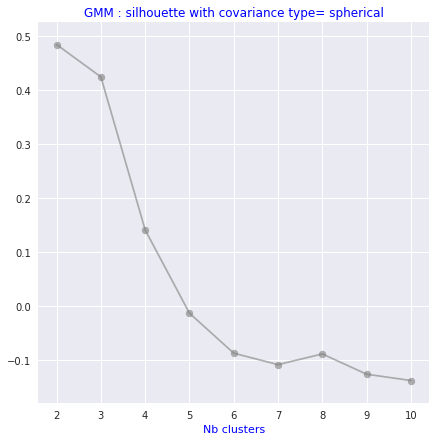

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title("GMM : silhouette with covariance type= "+covariance_type,color='blue')
plt.xlabel("Nb clusters",color='blue')

z_ = plt.scatter(dict_silhouette_score.keys(), dict_silhouette_score.values(), c='grey', alpha=0.6)    
z_ = plt.plot(dict_silhouette_score.keys(), dict_silhouette_score.values(), c='grey', alpha=0.6)    

#plt.set_title("GMM silhouette",color='blue')
#plt.grid(True)


#### Selection of best cluster number

In [51]:
n_cluster = 4

#### GMM : checking convergence of reduced dimension

In [52]:
from sklearn.mixture import GaussianMixture
X =df_customers.values
gmm_model = GaussianMixture(n_cluster, covariance_type=covariance_type, random_state=0)
gmm_model.fit(X)
print(gmm_model.converged_)

True


#### Effectif dans chaque cluster

(2124, 251)
(2124, 251)
Clusters = [0 1 2 3]
Population cumulée par cluster = 2124
         Count
cluster       
0          937
1            1
2          912
3          274


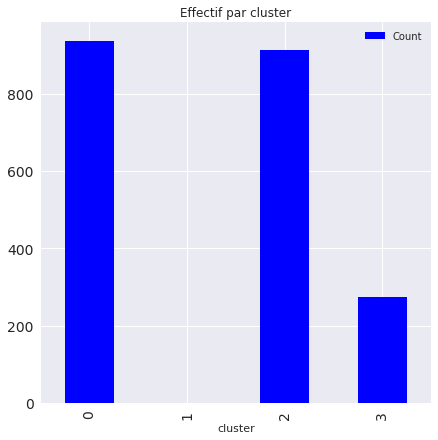

In [53]:
import p5_util
import p5_util_plot
pred_gmm = gmm_model.predict(df_customers.values)
print(df_customers.shape)
df_customers = p5_util.df_add_cluster(df_customers, pred_gmm)
print(df_customers.shape)
p5_util_plot.plot_cluster_frequency(df_customers)

In [54]:
from sklearn.metrics import silhouette_score
preds_gmm = dict_gmm[3].predict(df_customers.values)
silhouette_score(df_customers.values, preds_gmm)

0.41588517757708215

#### Carctérisation cluster 1

In [58]:
import p5_util

fileName = './data/df_invoice_line_sample_random.dump'
df_invoice_line_sample = p5_util.object_load(fileName)

p5_util.object_load : fileName= ./data/df_invoice_line_sample_random.dump


In [59]:
customerID = df_customers[df_customers.cluster==1].index[0]
print("Cluster 1 : Customer ID = "+str(customerID))

Cluster 1 : Customer ID = 17841


In [61]:
len(df_invoice_line_sample[df_invoice_line_sample.CustomerID==customerID])

7675

----------------------InvoiceLineCount----------------------
Moyenne: 91.76412429378531
Mediane: 41.0
Modes: 0    6
dtype: int32
Variance: 56596.46272423314
Ecart:237.90011081172943


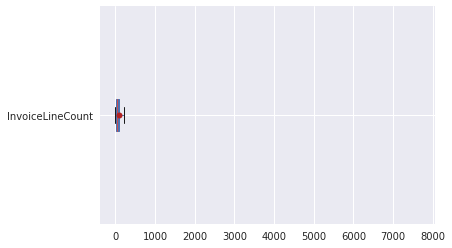

----------------------InvoiceLineCount----------------------
Moyenne: 91.76412429378531
Mediane: 41.0
Modes: 0    6
dtype: int32
Variance: 56596.46272423314
Ecart:237.90011081172943


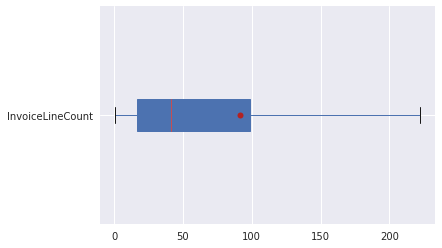

In [62]:
import p3_util_plot

df = df_invoice_line_sample.groupby('CustomerID').agg({'CustomerID': lambda x: len(x)})
df.sample(1)
df.rename(columns={'CustomerID':'InvoiceLineCount'}, inplace=True)
p3_util_plot.df_boxplot_list_display(df, ['InvoiceLineCount'], show_outliers=True )
p3_util_plot.df_boxplot_list_display(df, ['InvoiceLineCount'], show_outliers=False )


In [63]:
df.InvoiceLineCount.sort_values(ascending=False)

CustomerID
17841    7675
12748    4410
14606    2677
13089    1814
14298    1637
18118    1263
16033    1128
15005    1112
14056    1088
14769    1062
14527     971
17511     963
14456     947
16549     925
16931     886
17811     828
14505     785
17757     740
15547     695
17920     665
16904     665
16241     655
16360     636
15856     628
16923     626
16713     619
13969     619
13230     587
13098     572
13694     568
         ... 
17102       1
13366       1
14705       1
17291       1
14576       1
15940       1
17925       1
13703       1
13747       1
17747       1
17752       1
17763       1
18068       1
16953       1
18084       1
15313       1
15316       1
16881       1
18113       1
15524       1
13135       1
16765       1
13120       1
13106       1
15668       1
13099       1
15753       1
15823       1
18184       1
12346       1
Name: InvoiceLineCount, Length: 2124, dtype: int32

#### Caractérisation clusters 0 et 2

In [64]:
df_invoice_line_sample.sample(1)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
44769,543275,22431,WATERING CAN BLUE ELEPHANT,1,2011-02-06 12:49:00,1.95,13584


In [65]:
df_cluster_0 = df_customers[df_customers.cluster==0]
df_cluster_0['CustID'] = df_cluster_0.index
df_cluster_0.sample(1)

,cluster,nlp_pca_0,nlp_pca_1,nlp_pca_2,nlp_pca_3,nlp_pca_4,nlp_pca_5,nlp_pca_6,nlp_pca_7,nlp_pca_8,...,nlp_pca_241,nlp_pca_242,nlp_pca_243,nlp_pca_244,nlp_pca_245,nlp_pca_246,nlp_pca_247,nlp_pca_248,nlp_pca_249,CustID
CustomerID,,,,,,,,,,,,,,,,,,,,,
13513,0,-9.420169,1.713817,2.338831,1.086447,0.487482,0.575547,0.207234,-0.283574,0.484433,...,-0.16457,-0.073053,-0.066821,0.100626,-0.200143,0.09574,0.032499,0.00391,-0.090656,13513
